In [3]:
import uproot as ur
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['legend.frameon']=True
plt.rcParams['legend.edgecolor']='white'
import uproot,glob,ROOT

from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"] = (10, 8)

import gc
pdg=ROOT.TDatabasePDG()

Welcome to JupyROOT 6.28/04


In [4]:
import random

M=pdg.GetParticle(2212).Mass() #0.938272
E=10.5473

ymax=0.85
Wmin=2
Q2min=1
#W^2=(M**2+2M*nu-Q2)
#=M**2+Q2/x-Q2
#y=nu/E
#=Q2/(E*x*2*M)


#Q2>1, W>2, y < .85

#Q2>2 E M x ymax
#Q2<(W2min-M2)/(1/x-1)
   

/var/folders/_x/mzz2_hcx0dg4mv6b9blzjpp40000gn/T/ipykernel_29285/1699707450.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,(Wmin**2-M**2)/(1/x-1))


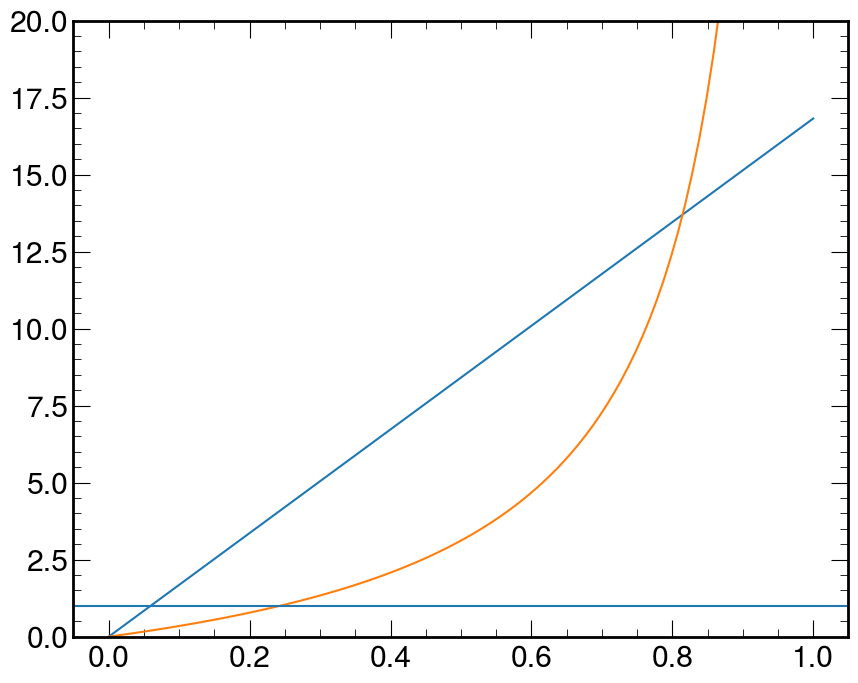

In [5]:
x=np.linspace(0, 1, 100)
plt.plot(x,2*E*M*ymax*x)
plt.plot(x,(Wmin**2-M**2)/(1/x-1))
plt.ylim(0, 20)
plt.axhline(Q2min)

In [6]:
r=random.Random()
logMinQ2=np.log(1)
logMaxQ2=np.log(13.5)

def toLund(filename, nEvents=10000000, split=None):
    #if using the "split" option, create a directory and fill it with files from sub indices
    if split is not None:
        import os
        try:
            os.mkdir(filename)
        except:
            pass
        for i in range(split):
            toLund(f"{filename}/{filename}_{i}.lund", nEvents//split)
        return
    with open(filename, "w") as f:
        for i in range(nEvents):
#             1 Number of particles
#             2 Mass number of the target (UD)
#             3 Atomic number oif the target (UD)
#             4 Target polarization (UD)
#             5 Beam Polarization
#             6 Beam type, electron=11, photon=22” (UD)
#             7 Beam energy (GeV) (UD)
#             8 Interacted nucleon ID (2212 or 2112) (UD)
#             9 Process ID (UD)
#             10 Event weight (UD)
            while True:
                x=r.uniform(0, 1)
                Q2=np.exp(r.uniform(logMinQ2, logMaxQ2))
                if Q2<2*E*M*x*ymax and Q2>(Wmin**2-M**2)/(1/x-1):
                    break
            phi=r.uniform(0,2*np.pi)
            
            
            print(1, 1, 1,0, 0, 11,E,2212, 0, 1, file=f)
            pid=11
            nu=Q2/(2*M*x)
            Ee=E-nu
            pe=np.sqrt(Ee**2-0.000511**2)
            
            theta=2*np.arcsin(np.sqrt(Q2/(4*E*Ee)))
            px=pe*np.sin(theta)*np.cos(phi)
            py=pe*np.sin(theta)*np.sin(phi)
            pz=pe*np.cos(theta)
            
            vx=0; vy=0; vz=0
            
            print(1, 0, 1, pid, 0,0, 
              px, 
              py,
              pz,
              Ee,
              0.000511, 
              vx/10,
              vy/10,
              vz/10, 
                 file=f)

In [9]:
toLund("DIS_events",10000000,10000)

In [7]:
xs=[]
Q2s=[]
for i in range(1000000):
    while True:
        x=r.uniform(0, 1)
        Q2=np.exp(r.uniform(logMinQ2, logMaxQ2))
        if Q2<2*E*M*x*ymax and Q2>(Wmin**2-M**2)/(1/x-1):
            break
    xs.append(x)
    Q2s.append(Q2)

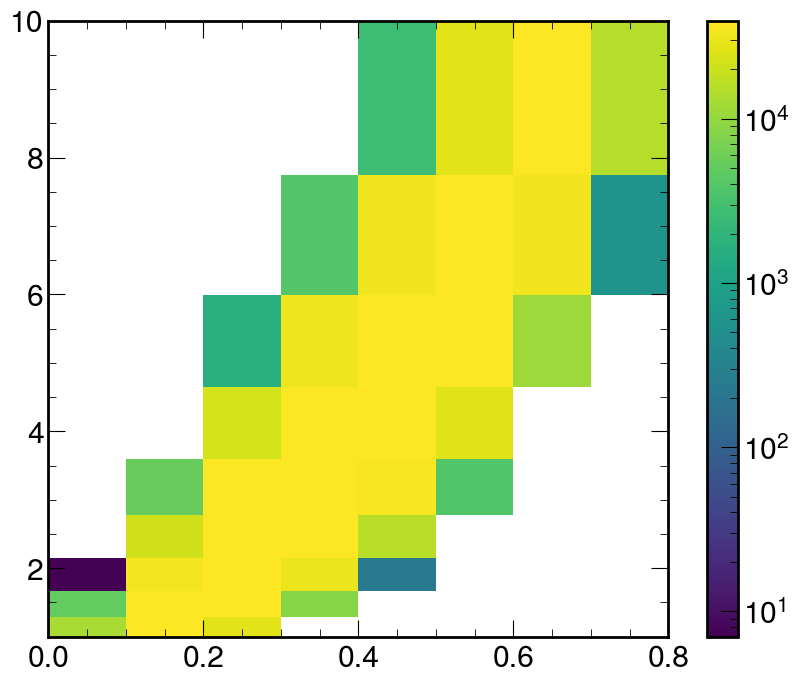

In [8]:
import matplotlib
z,x,y, a= plt.hist2d(xs, Q2s, bins=(np.linspace(0, 0.8, 9), np.exp(np.linspace(0, np.log(10), 10))), 
                     norm=matplotlib.colors.LogNorm())
plt.colorbar(a)

Text(0, 1, '$Q^2$ [GeV$^2$]')

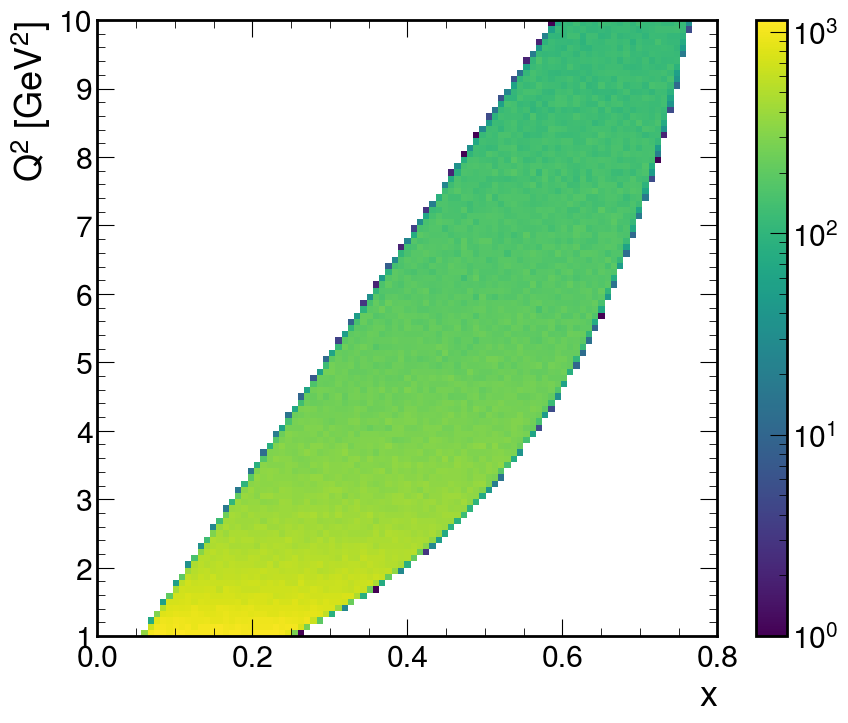

In [10]:
import matplotlib
import matplotlib.pyplot as plt
z,x,y, a= plt.hist2d(xs, Q2s, bins=(np.linspace(0, 0.8, 100), np.linspace(1, 10, 100)), 
                     norm=matplotlib.colors.LogNorm())
plt.colorbar(a)
plt.xlabel("x")
plt.ylabel("$Q^2$ [GeV$^2$]")